# Tricorn (Mandelbar set)
___
The *Tricorn* (sometimes called the *Mandelbar set*) $M^*$ is the set of  $c\in \mathbb{C}$  which satisfy $f^n_c(0)$$(n \ge 1)$is bounded:
$$M^* = \bigl\{ c\in \mathbb{C}\bigm|\{f^n_c(0)\}_{n\ge 1} : bounded\bigr\},$$
where $\ \ f^1_c(z) =  f_c(z) = \overline{z}^2 + c $, $\ \ f^n_c = f^{n-1}_c \circ f_c$.  
For more details, see [Wikipedia--Tricorn][link].
___
[link]:https://en.wikipedia.org/wiki/Tricorn_(mathematics)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def tricorn(x_min, x_max, y_min, y_max, N, x_pix, y_pix, R):
    x = np.linspace(x_min, x_max, x_pix).astype(np.float32) 
    y = np.linspace(y_max, y_min, y_pix).reshape(y_pix, 1).astype(np.float32) * 1j
                     # below of y-axis is smaller
    c = x + y   #broadcasting by numpy 
    counter = np.zeros_like(c, dtype=np.uint32)
    z = np.zeros_like(c)        
    boolean = np.zeros_like(c, dtype=bool)
    for i in range(N):
        z[boolean] = np.conj(z[boolean])**2 + c[boolean]
        boolean = np.less(abs(z), R)
        if not boolean.any():
            break
        counter[boolean] += 1
    return counter


def draw_tc(x_min, x_max, y_min, y_max, N, 
            x_pix=1000, y_pix=1000, R=3, colormap='viridis'):
    counter = tricorn(x_min, x_max, y_min, y_max, N, x_pix, y_pix, R)
    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks(np.linspace(x_min, x_max, 5))
    ax.set_yticks(np.linspace(y_min, y_max, 5))
    ax.set_title("Tricorn")
    plt.imshow(counter, extent=[x_min, x_max, y_min, y_max], cmap=colormap)

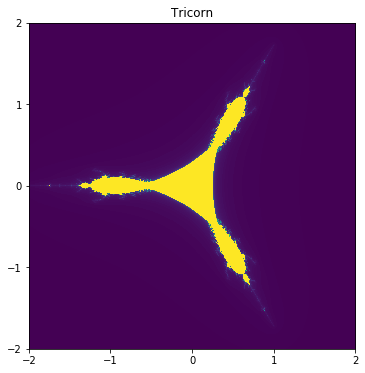

In [2]:
x_min = -2
x_max =  2
y_min = -2
y_max =  2
N = 200
x_pix = 1000
y_pix = 1000

draw_tc(x_min, x_max, y_min, y_max, N, x_pix, y_pix)
#plt.savefig("./pictures/tricorn.png")

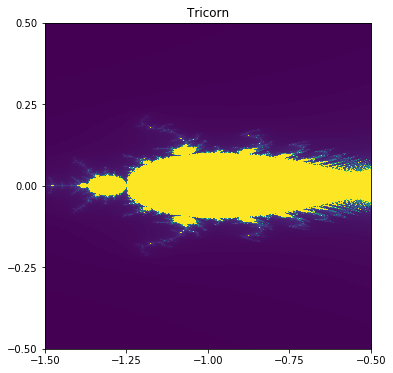

In [3]:
x_min = -1.5
x_max = -0.5
y_min = -0.5
y_max =  0.5
N = 200
x_pix = 1000
y_pix = 1000

draw_tc(x_min, x_max, y_min, y_max, N, x_pix, y_pix)
plt.savefig("./pictures/tricorn2.png")

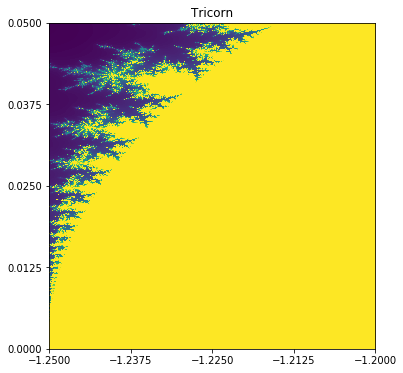

In [4]:
x_min = -1.25
x_max = -1.2
y_min =  0
y_max =  0.05
N = 200
x_pix = 1000
y_pix = 1000

draw_tc(x_min, x_max, y_min, y_max, N, x_pix, y_pix)
#plt.savefig("./pictures/tricorn3.png")